In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import h5py as h5
# import time
# import sys
# import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('../../Scripts')
# import string

# import ClassCosmicIntegrator  as CI #Given settings and redshifts returns rates (2D arrays) Loads the data
# import coencodeVarious        as CV
from PostProcessingScripts import * 


import pandas as pd 

# just to make the cells appear wider:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# adjust fontsize 
fs=20

# Plot figure 1 

The function & blocks below plot Figure 1 of the Double Compact Object Paper. The data is summarized in several csv files that you can download from the corresponding Zenodo directory. 
The data for this plot are given in the directory summary_data_Fig_1, and are called 
 - formationRatesTotalAndPerChannel_BHBH_.csv
 - formationRatesTotalAndPerChannel_BHNS_.csv
 - formationRatesTotalAndPerChannel_NSNS_.csv
    
they contain more information (namely the rates for all formation channels), but we will only use the "total" rate here. 

You will have to change the path in the code to the path where your folder summary_data_Fig_1 is located to read in the pandas files. 




In [3]:






def plotFormationChannelsPerMetallicitySingle(axe=[], metallicities=[0.001, 0.33], formationRates=[0,0], colorlist=['k'], totalcolor='k', BPSmodelname='A',Ylim=3.85, DCOtype='BBH'):
    
    
    # start building from 0
    upperY = np.zeros_like(formationRates[0])
    lowerY = np.zeros_like(formationRates[0])
    
    solar=0.0142

    total = 0 
    for ind_c, c_rate in enumerate(formationRates):
        total += c_rate 
    
    total_sum = np.sum(total)
    
    for ind_c, c_rate in enumerate(formationRates):
        
        # add this rate, 
        upperY += c_rate
        percentage = (np.sum(c_rate) / total_sum)*100.
        percentage_str =  r'$%s$'%str((roundAndFormat1(percentage))) + str(r'\%')
        
        axe.fill_between(metallicities, lowerY*1e5, upperY*1e5, facecolor=colorlist[ind_c], \
                  lw=3, alpha=1, label=percentage_str)
        lowerY += c_rate
    
   

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        axe.plot([zz,zz], [0,Ylim+1], \
                         c='k',\
                         lw=1.2, alpha=1, linestyle=':', zorder=100)   
        axe.text(zz-0.06, Ylim-0.022, s=text_list[zz_ind], fontsize=fs-8.5, rotation=90, verticalalignment='top')   





        
    # location of the small legends is on the left, unless it does not fit:
    if DCOtype=='BBH':
        x_box, y_box = 0.63, .4
    elif (DCOtype=='BNS') and (BPSmodelname=='G'):
        x_box, y_box = 0.63, .4
    else:
        x_box, y_box = 0.02, .5
        
    axe.legend(fontsize=14,  ncol=2, \
               bbox_to_anchor=(x_box, y_box),loc="lower left", borderaxespad=0., frameon=False).set_zorder(10000)
   
    axe.set_xlim(min(metallicities), max(metallicities))
    axe.set_ylim(0,Ylim)
        
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
    axe.annotate(r'\textbf{model %s:}'%(BPSmodelname) +'\n' + alphabetPhysicalNameDict[BPSmodelname], xy=(0.042, .95),\
                 xycoords='axes fraction', fontsize = fs, weight = 'bold', ha='left', va="top",bbox=bbox_props,\
                zorder=1E10)

    
    return axe
    
    

# for labeling

In [4]:
nModels=15
BPSnameslist = list(string.ascii_uppercase)[0:nModels]
modelDirList = ['fiducial', 'massTransferEfficiencyFixed_0_25', 'massTransferEfficiencyFixed_0_5', 'massTransferEfficiencyFixed_0_75', \
               'unstableCaseBB', 'alpha0_5', 'alpha2_0', 'fiducial', 'rapid', 'maxNSmass2_0', 'maxNSmass3_0', 'noPISN',  'ccSNkick_100km_s', 'ccSNkick_30km_s', 'noBHkick' ]

alphabetDirDict =  {BPSnameslist[i]: modelDirList[i] for i in range(len(BPSnameslist))}


physicalNamesBPSmodels = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable case BB}',\
                           r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}=2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}=3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{cc}}=30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}=0\,\rm{km}\,\rm{s}^{-1}$' ]



alphabetPhysicalNameDict =  {BPSnameslist[i]: physicalNamesBPSmodels[i] for i in range(len(BPSnameslist))}



print(alphabetPhysicalNameDict['E'])

\textbf{unstable case BB}


# Plot Figure 1 , formation rate of DCO mergers as a function of metallicity

now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


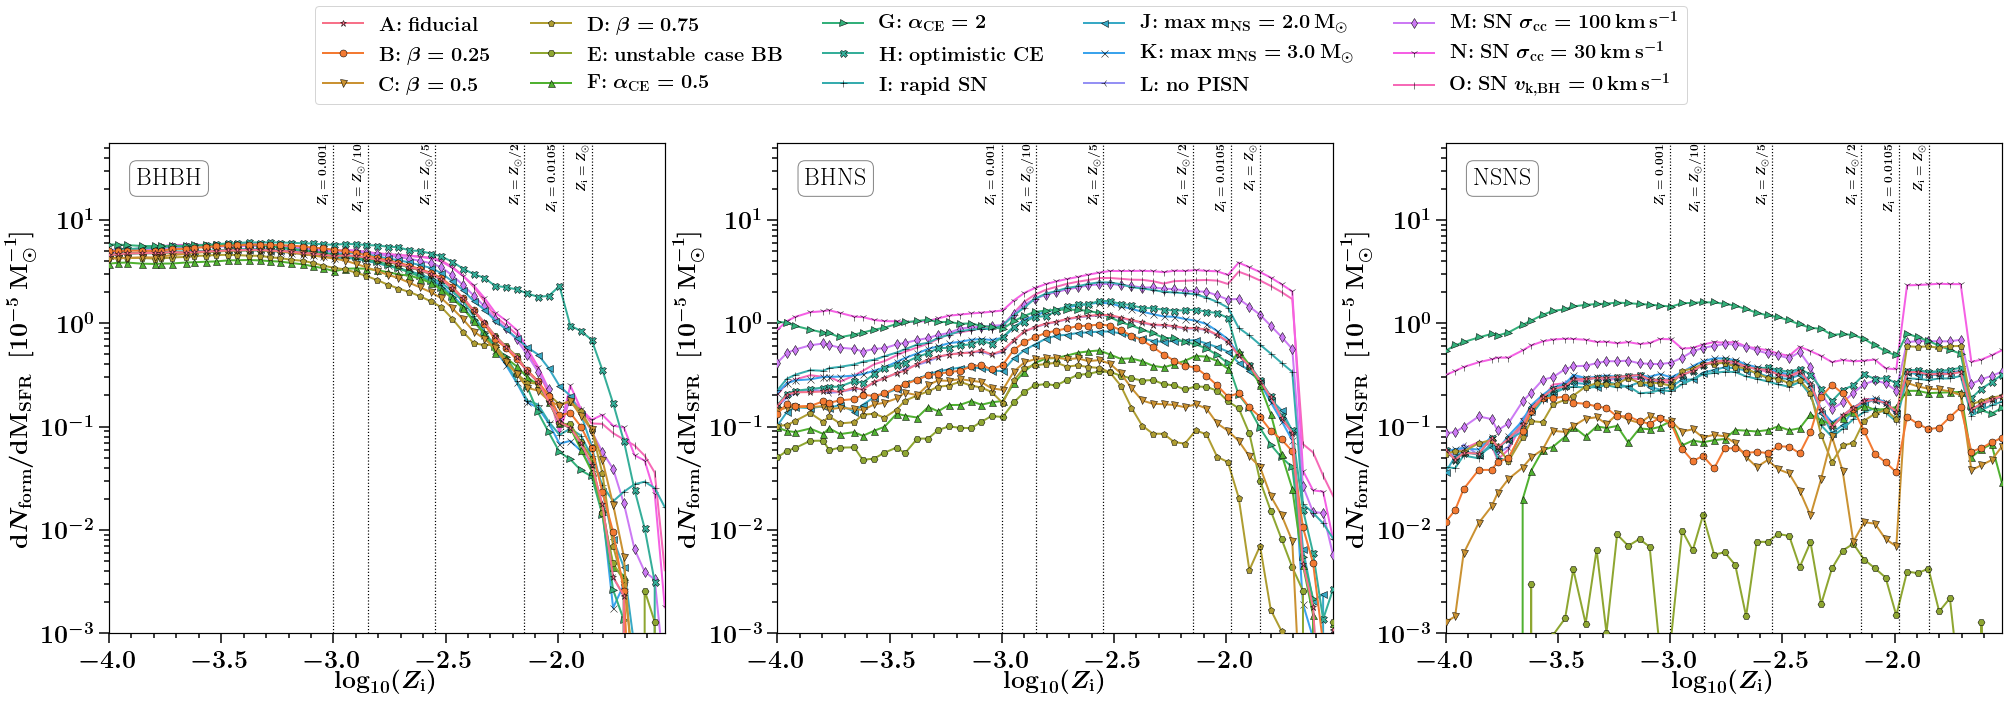

In [22]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='/summary_data_Fig_1', alphabetDirDict=alphabetDirDict):
    
    
    ncols=3
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(28,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    
    for ind_t, DCOtype in enumerate(Types):
        print('now at DCO type  ', DCOtype)
        
        DCOname = dictDCOtypeDCOlabel[DCOtype]
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel: 
            upperY = np.asarray(df[key_])
            del key_

            if ind_t==0:  
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
            else:
                labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
      
            axe[ind_t].plot(log10metallicities, upperY*1e5, color=BPScolors[ind_m], \
                      lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
            
        y_top=55
        if ind_t ==0:    
            handles, labels = axe[ind_t].get_legend_handles_labels()
            

        # plot Z values for some fixed metallicities
        text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                     r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                     r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
        for zz_ind, zz in enumerate([np.log10(solar), \
                                     np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                     np.log10(0.0105)]) :
            axe[ind_t].plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
            axe[ind_t].text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')


    
        nameX = r'$\log_{10}(Z_{\rm{i}})$'
        nameY = r'${\rm{d}} N_{\rm{form}} / \rm{d}M_{\rm{SFR}}  \ \  [10^{-5}\ \rm{M}_{\odot}^{-1}]\  $'
        axe[ind_t] = layoutAxes(axe[ind_t], nameX=nameX, nameY=nameY)
    

    

        axe[ind_t].set_yscale('log')
        aBit =0.
        axe[ind_t].set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
        axe[ind_t].set_ylim(bottom=0.001,top=y_top)

            
            
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe[ind_t].annotate(r'%s'%(TypesLabels[ind_t]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+4, weight = 'bold', ha='left', va="top",bbox=bbox_props)


    

    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=20, ncol=5,\
         bbox_to_anchor=(.452, 1.30)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRateAllModels3panels.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close() 

    
plotFormationRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    


# Plot rate ratios:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/Library/Frameworks/Python.fr

NameError: name 'CV' is not defined

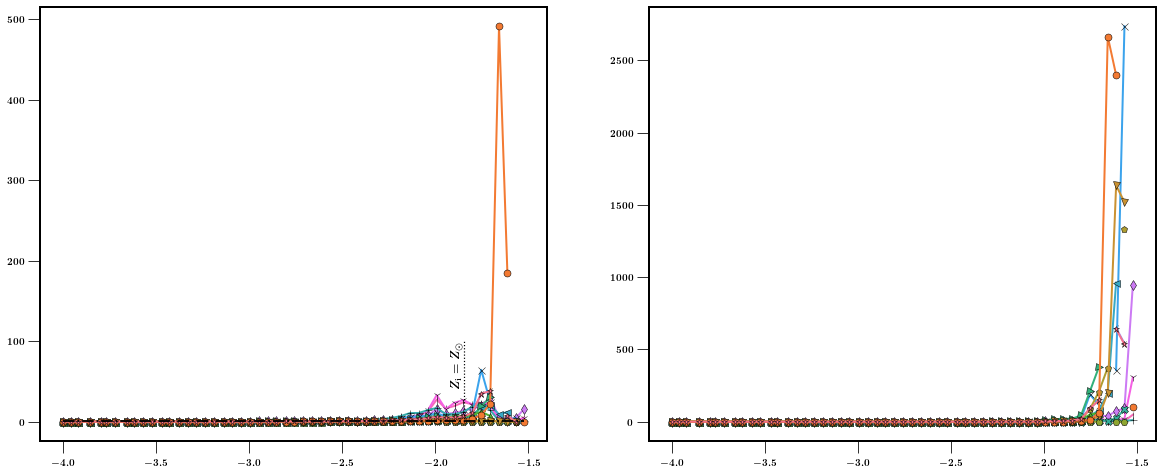

In [23]:
def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatioRatePerZ(pathCSVfile='/Volumes/Andromeda/DATA/AllDCO_bugfix/', alphabetDirDict=alphabetDirDict):
    
    
    ncols=2
    nrows=1
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,8), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})   
    
    Types      = ['BBH', 'BHNS',  'BNS']
    TypesLabels      = ['BHBH', 'BHNS',  'NSNS']
    nModels=15
    BPSnameslist = list(string.ascii_uppercase)[0:nModels]   
    BPScolors       = sns.color_palette("husl", len(BPSnameslist))
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|"]
    solar = 0.0142

    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}

    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]

    log10metallicities= np.log10(np.asarray(metallicities))
    
    
    temp = range(nModels+3)
    zorderlist = Reverse(temp)

    for ind_m, bps_model in enumerate(BPSnameslist):
        for ind_t, DCOtype in enumerate(Types):
            

            DCOname = dictDCOtypeDCOlabel[DCOtype]
            df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0)
        
        
            
#             print('now at model ', alphabetDirDict[bps_model])

            c_ = 'total'
            key_ =  bps_model + ' ' + c_ + '  [Msun^{-1}]'
            
            # rate of this channel:             
            upperY = np.asarray(df[key_])

            del key_
     

            labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] #BPSnameslist[ind_m]
#                 print(labelname)
#             else:
#                 labelname=None

            if ind_m ==0:
                mt="*"
            else:
                mt=None
                
                
            if ind_t==0:
                upperY_BHBH = upperY
            elif ind_t==1:
                upperY_BHNS = upperY
            elif ind_t==2:
                upperY_NSNS = upperY
      
        
        BHNSratio = upperY_BHNS/upperY_BHBH
        NSNSratio = upperY_NSNS/upperY_BHBH
        
        axe[0].plot(log10metallicities, BHNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
        axe[1].plot(log10metallicities, NSNSratio, color=BPScolors[ind_m], \
                  lw=2, alpha=1, marker=markershapes[ind_m], markersize=7,markeredgecolor='k',mew=0.5,\
                        linestyle='-', zorder=zorderlist[ind_m], label=None)            
            
        y_top=100

 

    # plot Z values for some fixed metallicities
    text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
                 r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
                 r'$Z_{\rm{i}}=0.001$', r'$Z_{\rm{i}}=0.0105$']    
    for zz_ind, zz in enumerate([np.log10(solar), \
                                 np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
                                 np.log10(0.0105)]) :
        for ind_ax in range(2):
            axe[ind_ax].plot([zz,zz], [0,y_top+1], \
                             c='k',\
                             lw=1.2, alpha=1, linestyle=':', zorder=100)  

            axe[ind_ax].text(zz-0.061, y_top-0.5, s=text_list[zz_ind], fontsize=fs-8, rotation=90, verticalalignment='top')

            axe[ind_ax].plot([min(log10metallicities), max(log10metallicities)], [1,1], \
                             c='k',\
                             lw=1.8, alpha=1, linestyle='-.', zorder=100) 

            nameX = r'$\log_{10}(Z_{\rm{i}})$'
            if ind_ax==0:
                nameY = r'$N_{\rm{BHNS}} / N_{\rm{BHBH}}   $'
            else:
                nameY = r'$N_{\rm{NSNS}} / N_{\rm{BHBH}}   $'
            axe[ind_ax] = CV.layoutAxes(axe[ind_ax], nameX=nameX, nameY=nameY)




            axe[ind_ax].set_yscale('log')
            aBit =0.
            axe[ind_ax].set_xlim(min(log10metallicities)-aBit, max(log10metallicities)+aBit)
            axe[ind_ax].set_ylim(bottom=0.001,top=1.*y_top)



            bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
            axe[ind_ax].annotate(r'%s'%(TypesLabels[ind_ax+1]), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+4, weight = 'bold', ha='left', va="top",bbox=bbox_props)


  
    handles, labels = axe[0].get_legend_handles_labels()     

    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=20, ncol=5,\
         bbox_to_anchor=(.912, 1.30)) #,  markerscale=3., scatterpoints=1)
    


    plt.savefig('./FormationRatioRateAllModels3panels.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.show()
    plt.close() 

    
plotFormationRatioRatePerZ(pathCSVfile='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_1/', alphabetDirDict=alphabetDirDict)    
    
    
